# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
262,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,NaN,NaN,NaN
4582,spam,For ur chance to win a å£250 wkly shopping spr...,NaN,NaN,NaN
1448,spam,As a registered optin subscriber ur draw 4 å£1...,NaN,NaN,NaN
2878,ham,U still painting ur wall?,NaN,NaN,NaN
2935,ham,And stop wondering \wow is she ever going to s...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1592,ham,Will it help if we propose going back again to...
4129,ham,And by when you're done I mean now
4653,ham,Hope you are having a great day.
3002,ham,I will see in half an hour
4376,ham,How much is torch in 9ja.


In [8]:
#renaming columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2879,spam,Last Chance! Claim ur å£150 worth of discount ...
5179,ham,"Hi hope u r both ok, he said he would text and..."
3793,ham,Short But Cute: \Be a good person
5274,ham,"Hi. Hope ur day * good! Back from walk, table ..."
4597,ham,I'm stuck in da middle of da row on da right h...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#duplicate value
df.duplicated().sum()

403

In [14]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

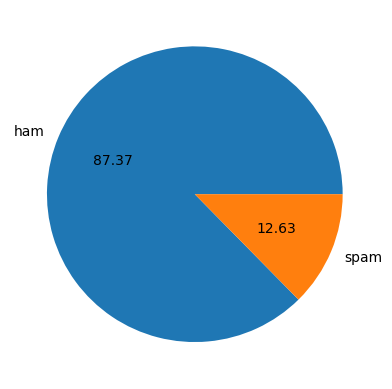

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.sample(5)

,target,text,num_characters
4856,0,Thanks and ! Or bomb and date as my phone wan...,58
2974,0,"Don't worry, * is easy once have ingredients!",45
864,0,Dude ive been seeing a lotta corvettes lately,45
1713,1,Hard LIVE 121 chat just 60p/min. Choose your g...,145
3481,1,Do you want a NEW video phone750 anytime any n...,148


In [26]:
#num of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.sample(5)

,target,text,num_characters,num_words
5246,0,Haven't eaten all day. I'm sitting here starin...,119,29
1725,0,You know there is. I shall speak to you in &l...,67,20
398,0,"Good evening Sir, Al Salam Wahleykkum.sharing ...",204,39
623,0,"sorry, no, have got few things to do. may be i...",58,17
1050,0,Are you available for soiree on June 3rd?,41,9


In [28]:
#num of sentence

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
1128,1,Ur HMV Quiz cash-balance is currently å£500 - ...,105,19,1
803,1,You have won a guaranteed å£200 award or even ...,143,30,2
5313,0,My sister going to earn more than me da.,40,10,1
2018,0,Ya it came a while ago,22,6,1
1740,1,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,159,29,3


In [30]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [31]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #ham msg

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #spam msg

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

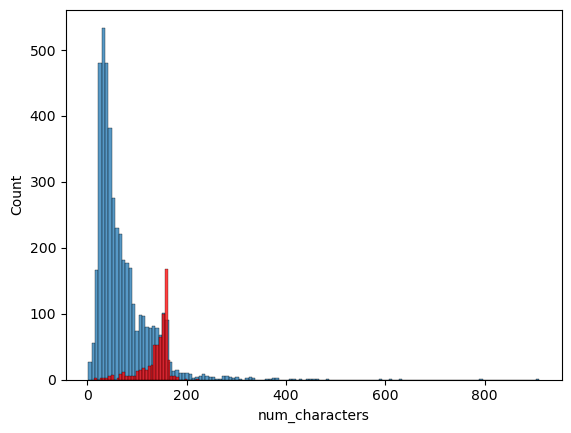

In [33]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

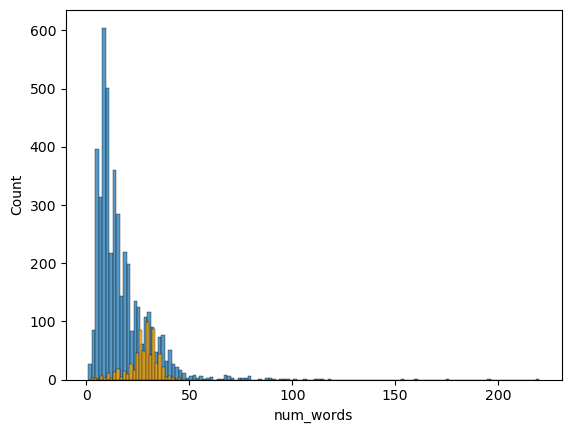

In [34]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='orange')

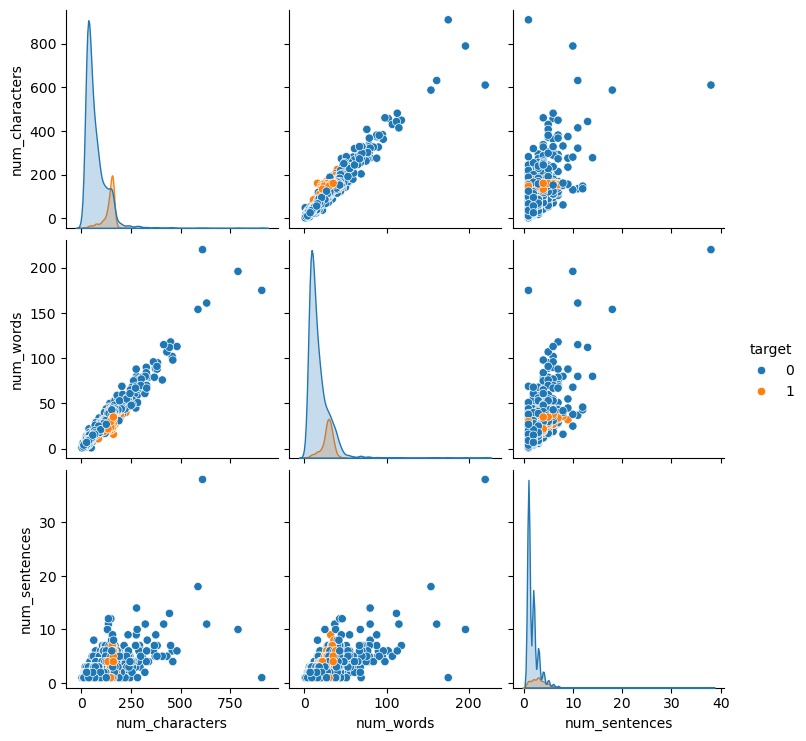

In [35]:
sns.pairplot(df,hue='target')

## Data Preprocessing

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [37]:
def transform_text(text):
    #lower case 
    text=text.lower()
    #tokenizing words
    text=nltk.word_tokenize(text)
    
    #removing special characters
    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    #removing stopwords and punctuation

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    #stemming

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.sample(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
4026,0,"Yes, princess. Are you going to make me moan?",45,12,2,ye princess go make moan
2017,0,"Better than bb. If he wont use it, his wife wi...",63,16,2,better bb wont use wife doctor


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [41]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

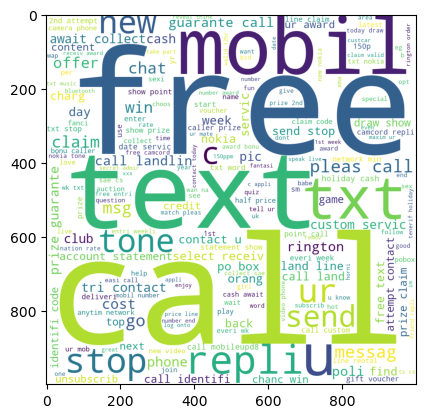

In [42]:
plt.imshow(spam_wc)

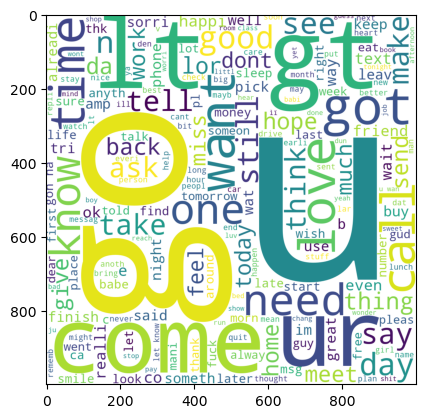

In [43]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.imshow(ham_wc)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

In [47]:
from collections import Counter

In [48]:
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30),
                              columns=['Word', 'Count'])

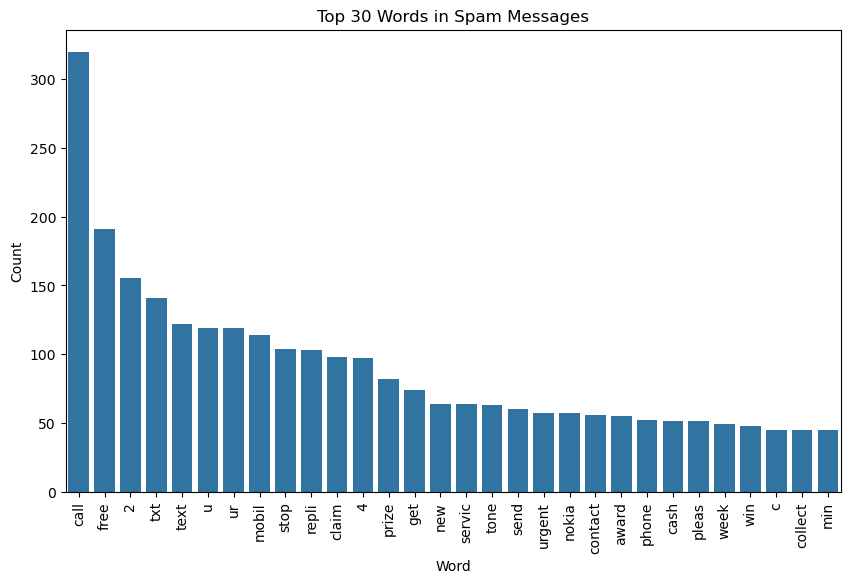

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=top_spam_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.show()

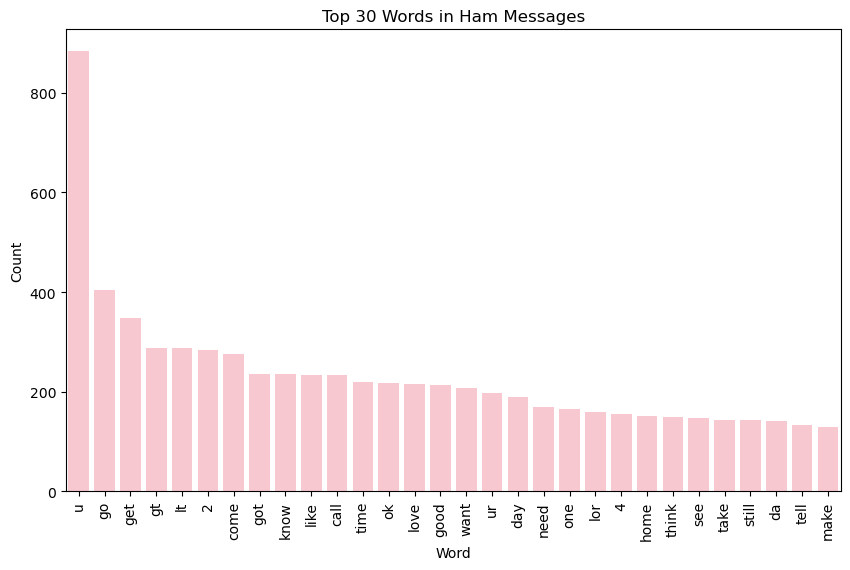

In [50]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

top_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30),
                              columns=['Word', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=top_ham_words,color='pink')
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Ham Messages")
plt.show()

## Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) 

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [70]:
X.shape

(5169, 3000)

In [54]:
Y=df['target'].values

In [55]:
Y.shape

(5169,)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [60]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))


0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [61]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [71]:
#tfidf(mnb)


import pickle


In [72]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
